<a href="https://colab.research.google.com/github/Adnan5603/brainybeam-task/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform time series analysis with pandas, including resampling, rolling statistics, and lagging.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/tested.csv")

In [3]:
df['Date'] = pd.date_range(start="2020-01-01", periods=len(df), freq='D')

In [4]:
df.set_index('Date', inplace=True)
print(df.head())

            PassengerId  Survived  Pclass  \
Date                                        
2020-01-01          892         0       3   
2020-01-02          893         1       3   
2020-01-03          894         0       2   
2020-01-04          895         0       3   
2020-01-05          896         1       3   

                                                    Name     Sex   Age  SibSp  \
Date                                                                            
2020-01-01                              Kelly, Mr. James    male  34.5      0   
2020-01-02              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2020-01-03                     Myles, Mr. Thomas Francis    male  62.0      0   
2020-01-04                              Wirz, Mr. Albert    male  27.0      0   
2020-01-05  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1   

            Parch   Ticket     Fare Cabin Embarked  
Date                                                
2020-01-01

In [5]:
monthly_survival = df['Survived'].resample('M').sum()
print("\nMonthly survival counts:")
print(monthly_survival.head())


Monthly survival counts:
Date
2020-01-31    12
2020-02-29    11
2020-03-31    13
2020-04-30    12
2020-05-31     8
Freq: ME, Name: Survived, dtype: int64


/tmp/ipython-input-2667766866.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_survival = df['Survived'].resample('M').sum()


In [6]:
df['Age_7d_rolling'] = df['Age'].rolling(window=7, min_periods=1).mean()
print("\nRolling average of Age (7 days):")
print(df[['Age', 'Age_7d_rolling']].head(15))


Rolling average of Age (7 days):
             Age  Age_7d_rolling
Date                            
2020-01-01  34.5       34.500000
2020-01-02  47.0       40.750000
2020-01-03  62.0       47.833333
2020-01-04  27.0       42.625000
2020-01-05  22.0       38.500000
2020-01-06  14.0       34.416667
2020-01-07  30.0       33.785714
2020-01-08  26.0       32.571429
2020-01-09  18.0       28.428571
2020-01-10  21.0       22.571429
2020-01-11   NaN       21.833333
2020-01-12  46.0       25.833333
2020-01-13  23.0       27.333333
2020-01-14  63.0       32.833333
2020-01-15  47.0       36.333333


In [7]:
df['Fare_lag1'] = df['Fare'].shift(1)
print("\nOriginal vs Lagged Fare:")
print(df[['Fare', 'Fare_lag1']].head(10))



Original vs Lagged Fare:
               Fare  Fare_lag1
Date                          
2020-01-01   7.8292        NaN
2020-01-02   7.0000     7.8292
2020-01-03   9.6875     7.0000
2020-01-04   8.6625     9.6875
2020-01-05  12.2875     8.6625
2020-01-06   9.2250    12.2875
2020-01-07   7.6292     9.2250
2020-01-08  29.0000     7.6292
2020-01-09   7.2292    29.0000
2020-01-10  24.1500     7.2292


In [8]:
import matplotlib.pyplot as plt

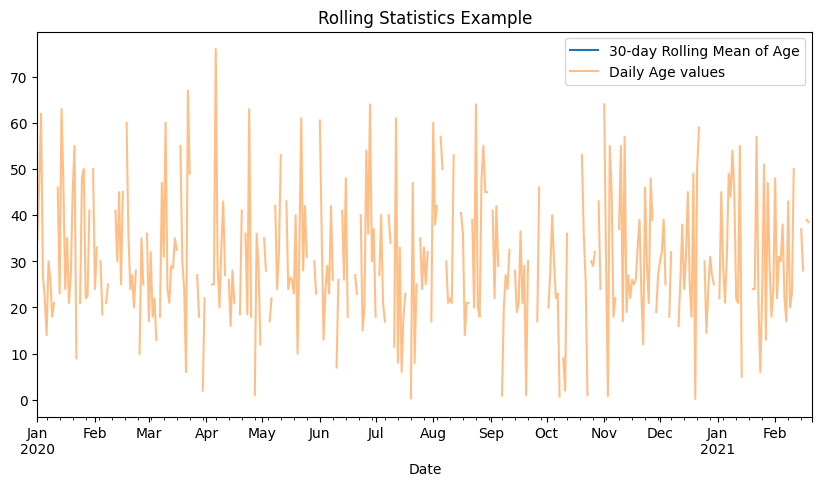

In [9]:
plt.figure(figsize=(10,5))
df['Age'].rolling(30).mean().plot(label="30-day Rolling Mean of Age")
df['Age'].plot(alpha=0.5, label="Daily Age values")
plt.legend()
plt.title("Rolling Statistics Example")
plt.show()